 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("../Starter_Code/Resources/whale_returns.csv")

In [3]:
whale_df = pd.read_csv(whale_data, index_col= "Date", infer_datetime_format= True, parse_dates= True)
whale_df = whale_df.sort_index()
whale_df.head()
whale_df

C:\Users\tyler\AppData\Local\Temp\ipykernel_676\2220816679.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_data, index_col= "Date", infer_datetime_format= True, parse_dates= True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Count nulls
null_count = whale_df.isnull().sum()
print("Number Of Null Values:", null_count)


Number Of Null Values: SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_data = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col= "Date", infer_datetime_format= True, parse_dates= True)
algo_df = algo_df.sort_index()
algo_df.head()
algo_df

C:\Users\tyler\AppData\Local\Temp\ipykernel_676\645775441.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_data, index_col= "Date", infer_datetime_format= True, parse_dates= True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
algo_null_count = algo_df.isnull().sum()
print("Number Of Null Values:", algo_null_count)


Number Of Null Values: Algo 1    0
Algo 2    6
dtype: int64


In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
snp_data = Path("../Starter_Code/Resources/sp500_history.csv")
snp_df = pd.read_csv(snp_data, index_col= "Date", infer_datetime_format= True, parse_dates= True)
snp_df = snp_df.sort_index()
snp_df.head()


C:\Users\tyler\AppData\Local\Temp\ipykernel_676\1835150374.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  snp_df = pd.read_csv(snp_data, index_col= "Date", infer_datetime_format= True, parse_dates= True)
C:\Users\tyler\AppData\Local\Temp\ipykernel_676\1835150374.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  snp_df = pd.read_csv(snp_data, index_col= "Date", infer_datetime_format= True, parse_dates= True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
snp_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
snp_df["Close"] = snp_df["Close"].str.replace("$","")
snp_df["Close"] = snp_df["Close"].str.replace(",","")
snp_df["Close"] = snp_df["Close"].astype("float")

In [12]:
# Calculate Daily Returns
snp_return = snp_df.pct_change()
snp_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
snp_return = snp_return.dropna().copy()
snp_return.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
snp_return = snp_return.rename(columns={"Close":"S&P 500"})
snp_return.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio = pd.concat([snp_return, algo_df, whale_df], axis= "columns", join= "inner")
all_portfolio.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

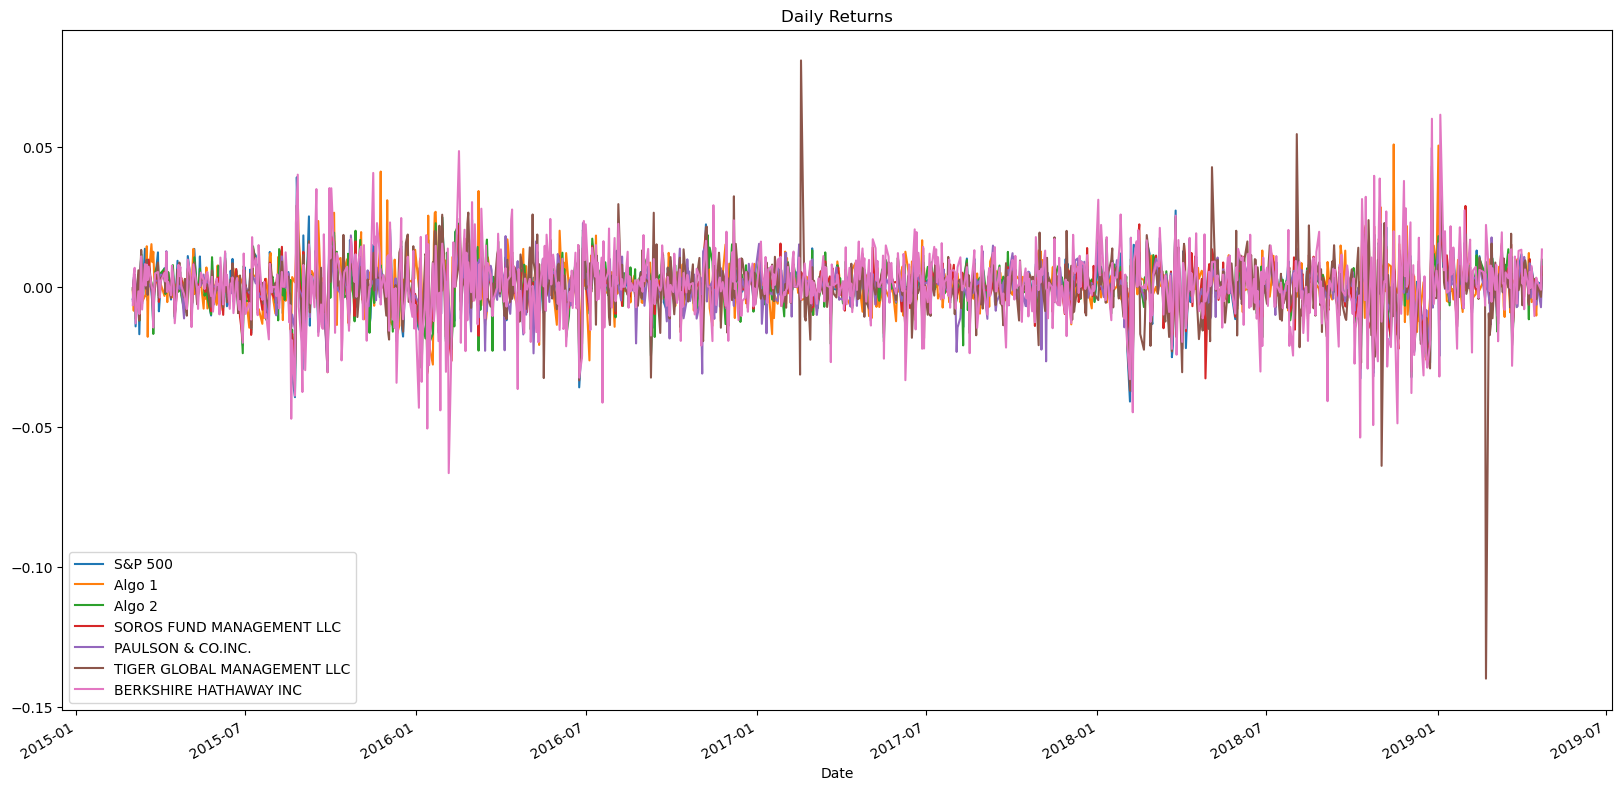

In [16]:
# Plot daily returns of all portfolios
all_portfolio.plot(figsize=(20,10),title= "Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

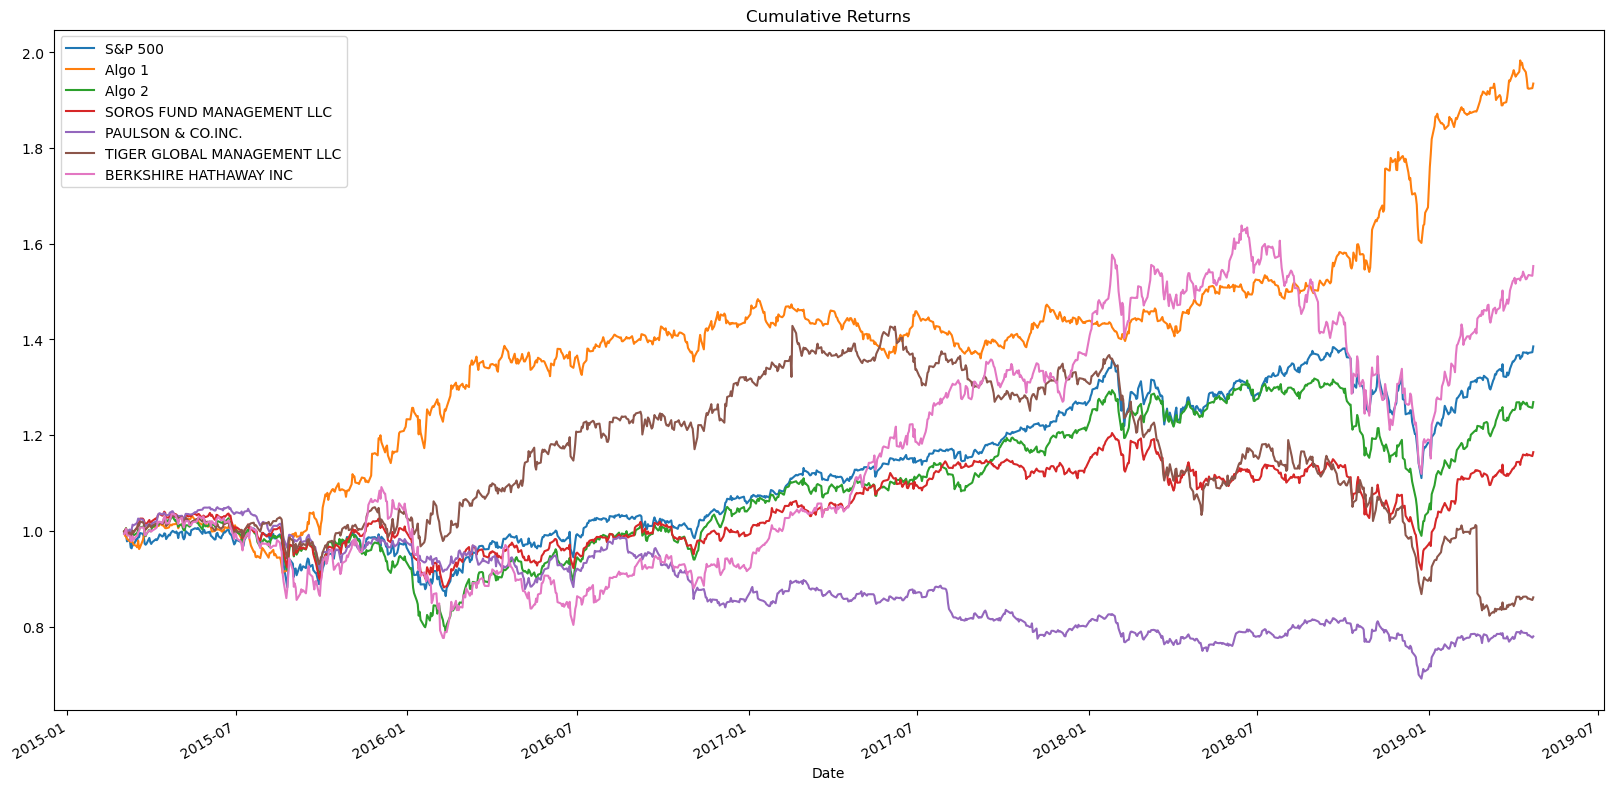

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolio).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title= "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Portfolios'}>

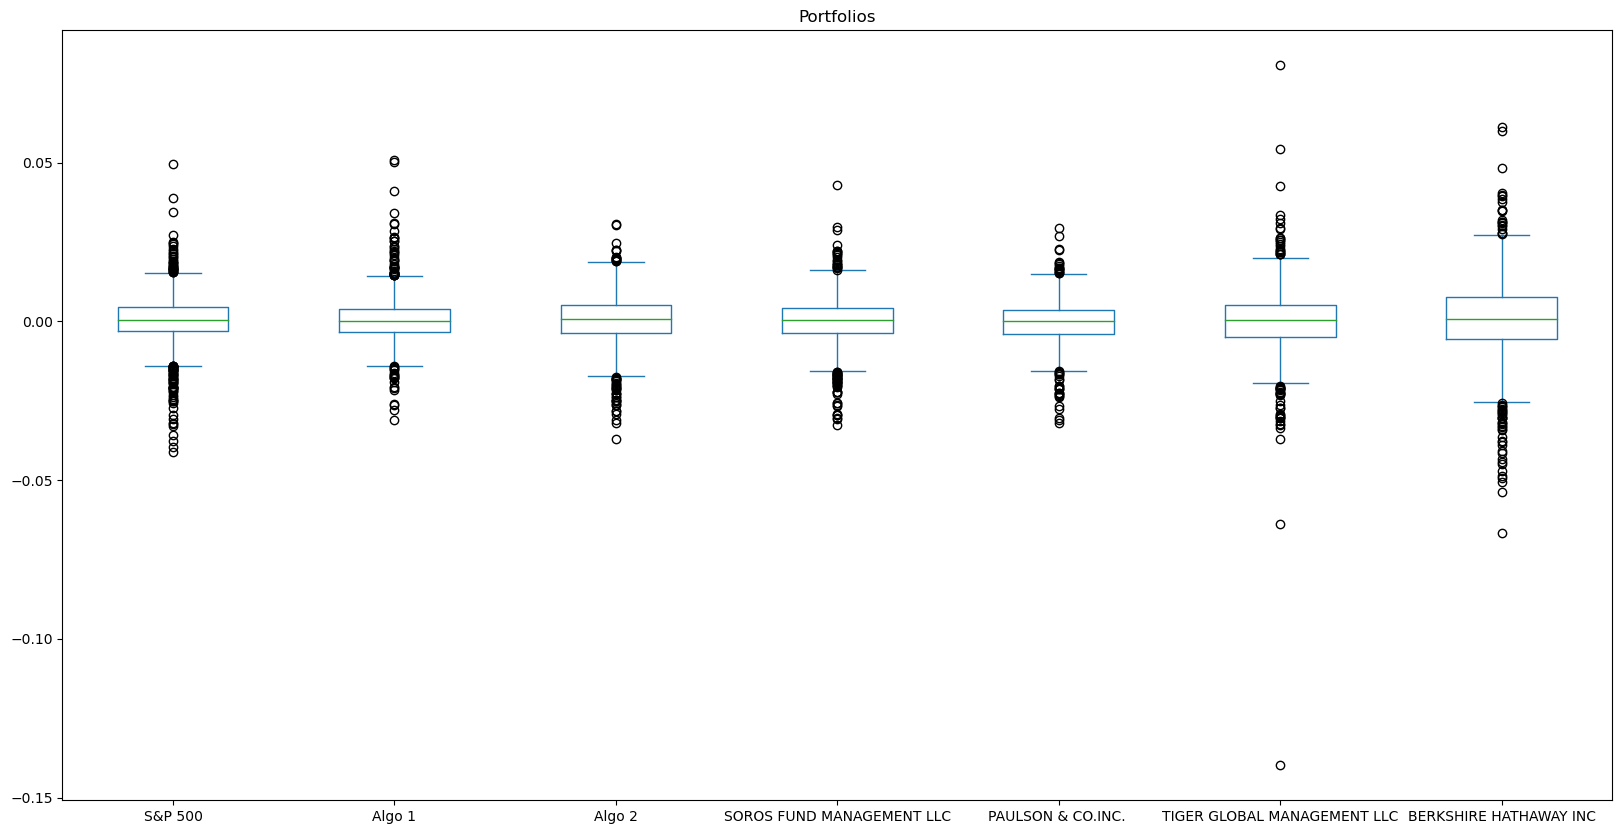

In [18]:
# Box plot to visually show risk
all_portfolio.plot(kind= "box",figsize=(20,10),title= "Portfolios")
#resize and re-title

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
all_portfolio.std()

S&P 500                        0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
snp_500_std = all_portfolio["S&P 500"].std()
# Determine which portfolios are riskier than the S&P 500
all_portfolio.std() > snp_500_std

S&P 500                        False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
daily_std = all_portfolio.std()
annualized_std = daily_std * (252**0.5)
annualized_std

S&P 500                        0.135786
Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation 21 Trading Days'}, xlabel='Date'>

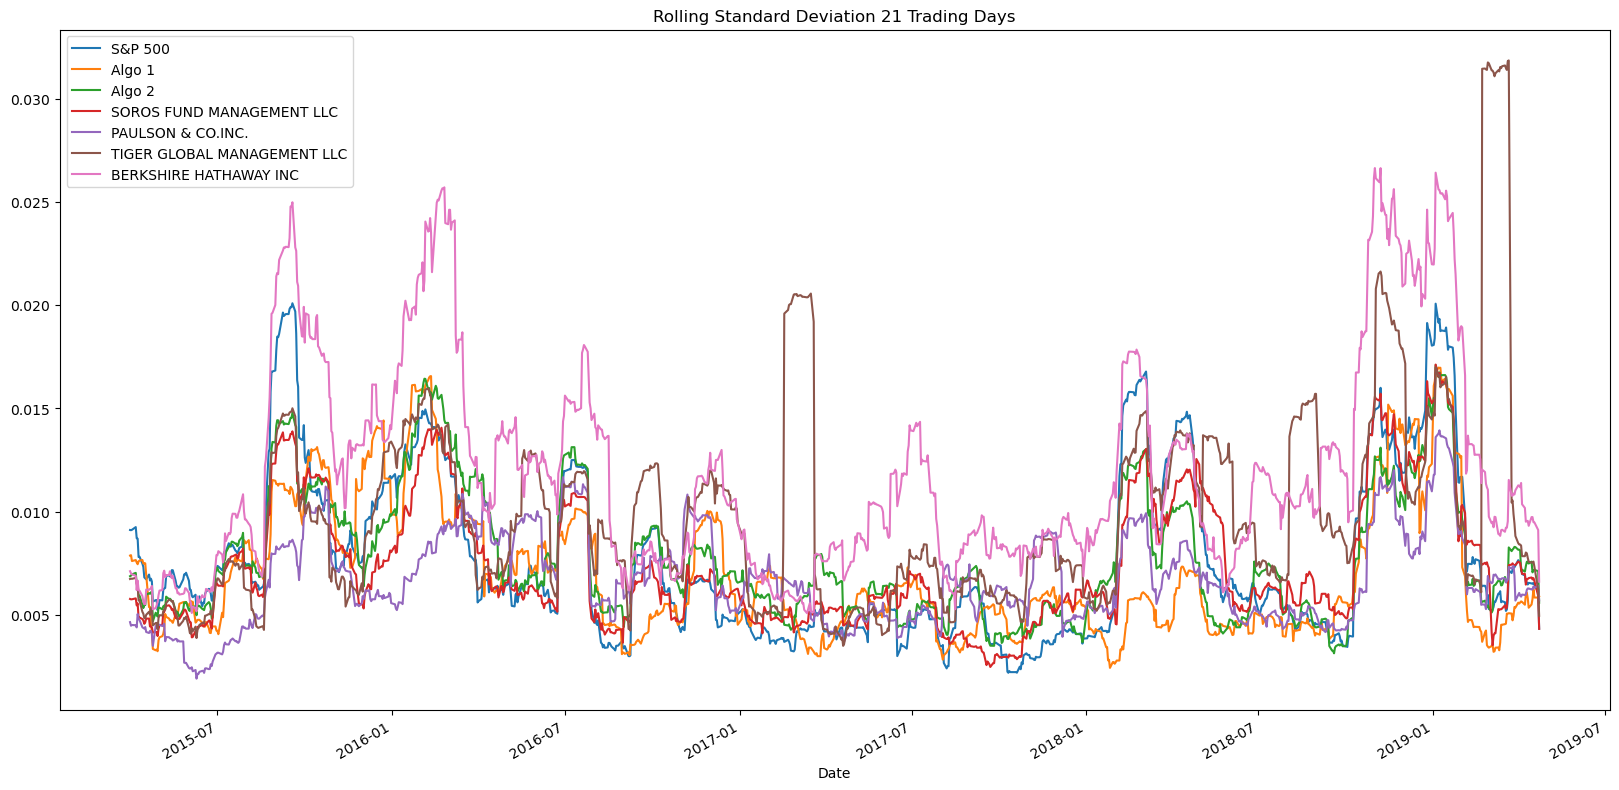

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), title= "Rolling Standard Deviation 21 Trading Days")

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = all_portfolio.corr()
# Display de correlation matrix
print(correlation)

                              S&P 500    Algo 1    Algo 2  \
S&P 500                      1.000000  0.279494  0.858764   
Algo 1                       0.279494  1.000000  0.288243   
Algo 2                       0.858764  0.288243  1.000000   
SOROS FUND MANAGEMENT LLC    0.837864  0.321211  0.826873   
PAULSON & CO.INC.            0.669732  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC  0.623946  0.164387  0.507414   
BERKSHIRE HATHAWAY INC       0.751371  0.292033  0.688082   

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
S&P 500                                       0.837864            0.669732   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Berkshire Hathaway Inc. Beta'}, xlabel='Date'>

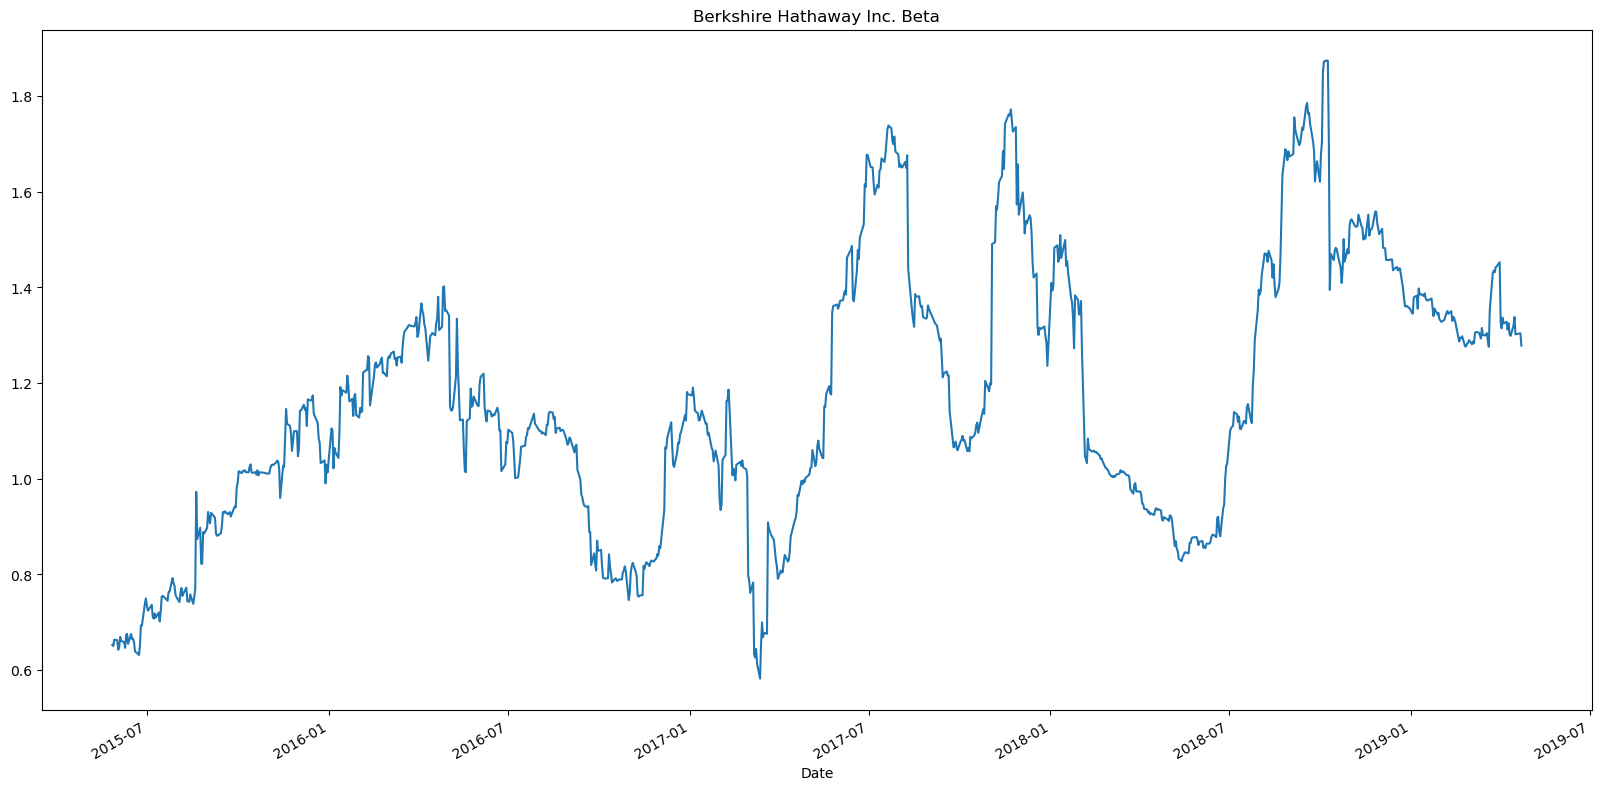

In [24]:
# Calculate covariance of a single portfolio
covariance = all_portfolio["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_portfolio["S&P 500"])
covariance
# Calculate variance of S&P 500
variance = all_portfolio["S&P 500"].rolling(60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Average'}, xlabel='Date'>

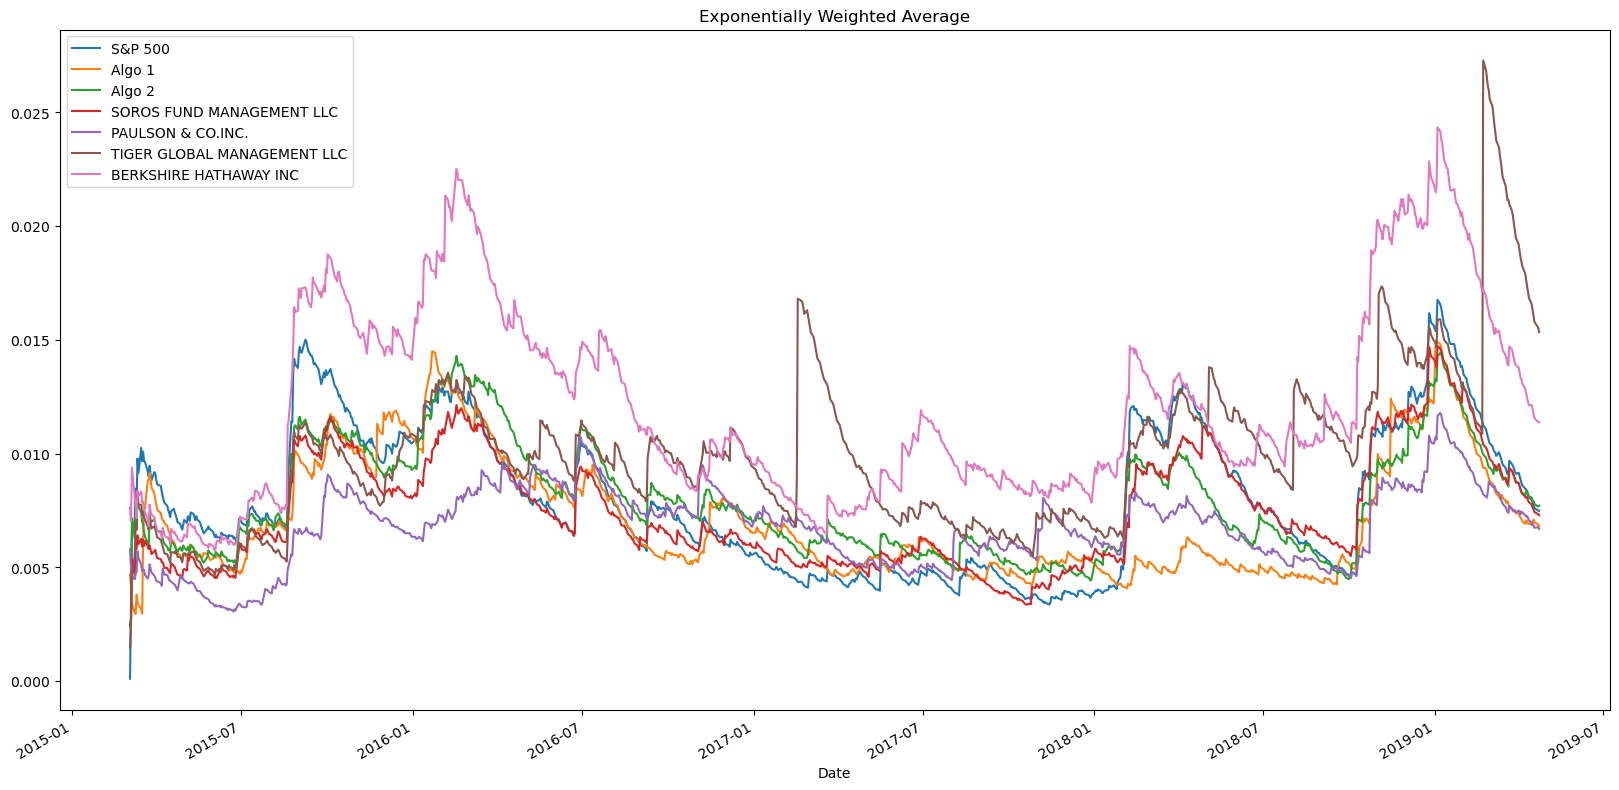

In [25]:
# Use `ewm` to calculate the rolling window
all_portfolio.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Annualized Sharpe Ratios
#average_daily_return = all_portfolio.mean()
#risk_free_rate = 0.02 / 252
#portfolio_std = all_portfolio.std()
#sharpe_ratios = (average_daily_return - risk_free_rate) / portfolio_std
#sharpe_ratios_annualized = sharpe_ratios * np.sqrt(252)

annualized_sharpe_ratios = (all_portfolio.mean() * 252) / (all_portfolio.std() * np.sqrt(252))

In [27]:
# Example daily returns (replace with your actual data)
#daily_std = np.array([0.001, 0.002, -0.001, 0.003, -0.002, 0.001, 0.002, -0.001, 0.002, 0.003])
# Risk-free rate (e.g., annual Treasury yield, expressed as a daily rate)
#risk_free_daily_rate = 0.0001
# Calculate the mean return and standard deviation of daily returns
#mean_return = np.mean(daily_std)
#std_deviation = np.std(daily_std)
# Calculate the Sharpe ratio using daily returns
#annualized_sharpe_ratio = (mean_return - risk_free_daily_rate) / std_deviation
# Annualize the Sharpe ratio (assuming 252 trading days in a year)
#annualized_sharpe_ratio = annualized_sharpe_ratio * np.sqrt(252)

In [28]:
# Create a bar plot to visualize the annualized Sharpe ratio
#labels = ['Portfolio']
#values = [annualized_sharpe_ratio]
#plt.bar(labels, values)
#plt.ylabel('Annualized Sharpe Ratio')
#plt.title('Annualized Sharpe Ratio Comparison')
#plt.show()
#print("Annualized Sharpe Ratio:", annualized_sharpe_ratio)

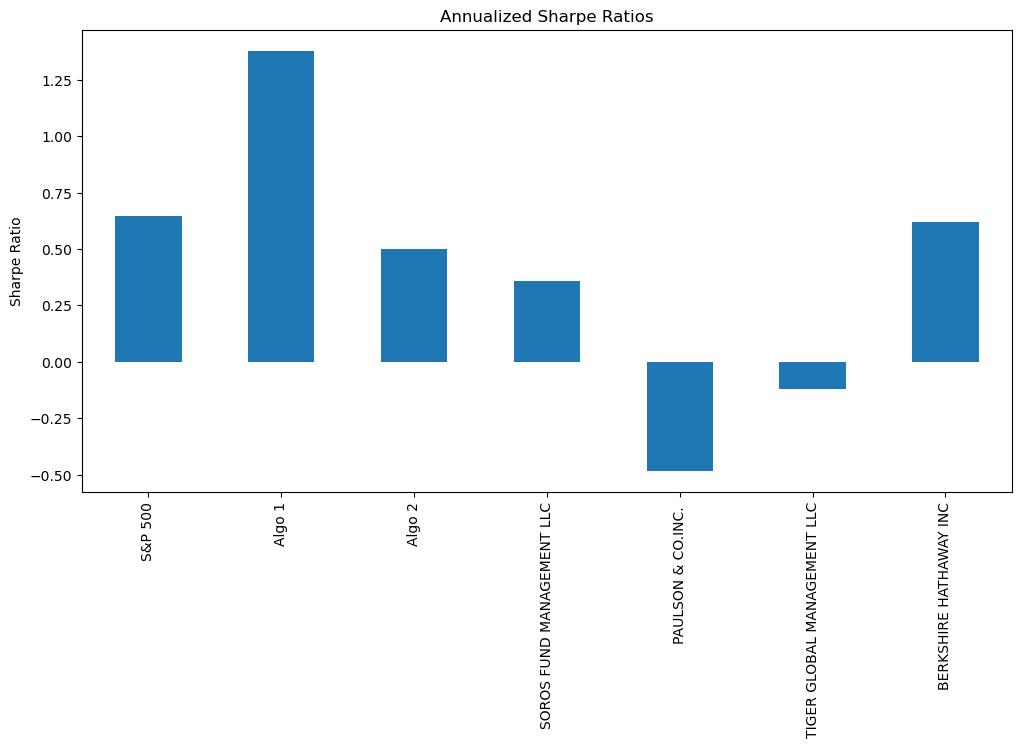

In [48]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind='bar', figsize=(12, 6), title='Annualized Sharpe Ratios')
plt.ylabel('Sharpe Ratio')
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock


In [31]:
# Reading data from 2nd stock


In [32]:
# Reading data from 3rd stock


In [33]:
# Combine all stocks in a single DataFrame


In [34]:
# Reset Date index


In [35]:
# Reorganize portfolio data by having a column per symbol


In [36]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [41]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [42]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [43]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios


In [45]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!